## EDA para datos de GOOGLE 

In [60]:
# Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
# Carga el primer archivo CSV
Review = pd.read_csv('c:/DataScience/Proyecto_Final/dfreviewgoo3_csv.csv')

# Carga el segundo archivo CSV
Metadata = pd.read_csv('c:/DataScience/Proyecto_Final/florida_restaurants.csv')

# Muestra las primeras filas de cada DataFrame
print(Review.head())
print(Metadata.head())


   Unnamed: 0                user_id                 name  \
0         515  105941553219163737304      Douglas Gummere   
1         516  109857700811373231502         David Powell   
2         961  114383550862594326875         Rhona Barnum   
3        1262  101770467939555366215  Medardo A. Cevallos   
4        1766  108970660648595440498        Velma Malagon   

                  time  rating  \
0  2018-09-20 00:12:47       1   
1  2018-08-22 11:13:16       5   
2  2017-12-04 15:43:10       4   
3  2018-02-19 21:42:44       5   
4  2020-02-29 00:03:09       1   

                                                text  \
0  Love this place. Great little restaurant, with...   
1  A classy restaurant to match the charm of the ...   
2  Lovely restaurant with nice view of the town o...   
3  Highly recommended; great spot for locals and ...   
4  I had such  High hopes for a neighborhood barb...   

                                 gmap_id  year  
0  0x8894b5a7a7909725:0xe4687299fd288188  

In [27]:
print(Review.columns)
print(Metadata.columns)


Index(['Unnamed: 0', 'user_id', 'name', 'time', 'rating', 'text', 'gmap_id',
       'year'],
      dtype='object')
Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'hours', 'MISC', 'state',
       'relative_results', 'url', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday'],
      dtype='object')


### Fusionar los DataFrames

In [28]:
# Fusionar los DataFrames en una sola tabla utilizando 'gmap_id'
combined_data = pd.merge(Review, Metadata, on='gmap_id', how='inner')

# Verificar el resultado de la fusión
combined_data.head()



,Unnamed: 0,user_id,name_x,time,rating,text,gmap_id,year,name_y,address,...,state,relative_results,url,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,515,105941553219163737304,Douglas Gummere,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,515,105941553219163737304,Douglas Gummere,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,516,109857700811373231502,David Powell,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,516,109857700811373231502,David Powell,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1262,101770467939555366215,Medardo A. Cevallos,2018-02-19 21:42:44,5,Highly recommended; great spot for locals and ...,0x88d900575f0dd065:0x9b3638d2a80be4d,2018,zampini's bottega,"zampini's bottega, 510 se 5th ave, fort lauder...",...,Permanently closed,NaN,https://www.google.com/maps/place//data=!4m2!3...,08:30:00-22:00:00,08:30:00-22:00:00,08:30:00-22:00:00,08:30:00-22:00:00,07:00:00-23:00:00,09:00:00-23:00:00,09:00:00-22:00:00


In [29]:
# Exportar el DataFrame combinado a un archivo CSV
combined_data.to_csv('combined_data.csv', index=False)

# Verificar que el archivo se haya creado
import os
print('combined_data.csv' in os.listdir())


True


### Limpieza de datos

#### Comenzamos haciendo una limpieza de los datos

In [30]:
# Eliminar duplicados
combined_data.drop_duplicates(inplace=True)

# Manejar valores nulos (ejemplo: rellenar con 'No hay información' o descartar)
combined_data.fillna('No hay información', inplace=True)

# Verificar los cambios
print(combined_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21828 non-null  int64  
 1   user_id           21828 non-null  object 
 2   name_x            21828 non-null  object 
 3   time              21828 non-null  object 
 4   rating            21828 non-null  int64  
 5   text              21828 non-null  object 
 6   gmap_id           21828 non-null  object 
 7   year              21828 non-null  int64  
 8   name_y            21828 non-null  object 
 9   address           21828 non-null  object 
 10  latitude          21828 non-null  float64
 11  longitude         21828 non-null  float64
 12  category          21828 non-null  object 
 13  avg_rating        21828 non-null  float64
 14  num_of_reviews    21828 non-null  int64  
 15  hours             21828 non-null  object 
 16  MISC              21828 non-null  object

#### tenemos dos columnas similares, veamos la información de cada una : name_x y name_y

In [31]:
# Verificar algunas entradas de name_x y name_y
print(combined_data[['name_x', 'name_y']].head(20))

# Verificar valores únicos en ambas columnas
print("Valores únicos en name_x:")
print(combined_data['name_x'].unique())

print("Valores únicos en name_y:")
print(combined_data['name_y'].unique())


                 name_x                                             name_y
0       Douglas Gummere  gormley's on the river | modern cuisine in his...
1       Douglas Gummere  gormley's on the river | modern cuisine in his...
2          David Powell  gormley's on the river | modern cuisine in his...
3          David Powell  gormley's on the river | modern cuisine in his...
4   Medardo A. Cevallos                                  zampini's bottega
5         Velma Malagon                         biscayne backyard barbecue
6         Hanan M'barki                   crab du jour cajun seafood & bar
7         Hanan M'barki                   crab du jour cajun seafood & bar
8         Hanan M'barki                   crab du jour cajun seafood & bar
9    Shona-Lee Thompson                               jk fast food & fruit
10   Shona-Lee Thompson                               jk fast food & fruit
11      Valentina Ruano                               jk fast food & fruit
12      Valentina Ruano  

##### De acuerdo con la informacion, name_x contiene los nombres de los usuarios y name_y contiene los nombres de los restaurantes.

##### Para el análisis de restaurantes de comida tipo americana, necesitamos centrarnos en los nombres de los restaurantes, por lo que podemos eliminar la columna name_x.

In [32]:
# Eliminar la columna 'name_x'
combined_data.drop(columns=['name_x'], inplace=True)

# Renombrar la columna 'name_y' a 'restaurant_name'
combined_data.rename(columns={'name_y': 'restaurant_name'}, inplace=True)

# Verificar el resultado
print(combined_data.head())
print(combined_data.columns)


   Unnamed: 0                user_id                 time  rating  \
0         515  105941553219163737304  2018-09-20 00:12:47       1   
1         515  105941553219163737304  2018-09-20 00:12:47       1   
2         516  109857700811373231502  2018-08-22 11:13:16       5   
3         516  109857700811373231502  2018-08-22 11:13:16       5   
4        1262  101770467939555366215  2018-02-19 21:42:44       5   

                                                text  \
0  Love this place. Great little restaurant, with...   
1  Love this place. Great little restaurant, with...   
2  A classy restaurant to match the charm of the ...   
3  A classy restaurant to match the charm of the ...   
4  Highly recommended; great spot for locals and ...   

                                 gmap_id  year  \
0  0x8894b5a7a7909725:0xe4687299fd288188  2018   
1  0x8894b5a7a7909725:0xe4687299fd288188  2018   
2  0x8894b5a7a7909725:0xe4687299fd288188  2018   
3  0x8894b5a7a7909725:0xe4687299fd288188  2018  

#### Para hacer un análisis enfocado en restaurantes de comida tipo americana, simplifiquemos los datos eliminando las columnas menos relevantes para este objetivo.

#### 'Unnamed: 0': Un índice innecesario que no aporta valor analítico.

#### 'relative_results': Información de resultados relacionados que no es crucial para el análisis.

#### 'MISC': Detalles variados que pueden no ser relevantes para el análisis general de restaurantes de comida americana.

#### 'state': tenemos esta informacion por los dias de la semana.

#### 'url': No es necesario para el análisis de datos.


In [33]:
# Eliminar columnas innecesarias
columns_to_drop = ['Unnamed: 0', 'relative_results', 'MISC', 'state', 'url']
combined_data_cleaned = combined_data.drop(columns=columns_to_drop)

# Verificar el resultado de la limpieza
print(combined_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          21828 non-null  object 
 1   time             21828 non-null  object 
 2   rating           21828 non-null  int64  
 3   text             21828 non-null  object 
 4   gmap_id          21828 non-null  object 
 5   year             21828 non-null  int64  
 6   restaurant_name  21828 non-null  object 
 7   address          21828 non-null  object 
 8   latitude         21828 non-null  float64
 9   longitude        21828 non-null  float64
 10  category         21828 non-null  object 
 11  avg_rating       21828 non-null  float64
 12  num_of_reviews   21828 non-null  int64  
 13  hours            21828 non-null  object 
 14  Monday           21828 non-null  object 
 15  Tuesday          21828 non-null  object 
 16  Wednesday        21828 non-null  object 
 17  Thursday    

In [34]:
combined_data_cleaned.head(3)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,avg_rating,num_of_reviews,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,4.3,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,No hay información
1,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,4.3,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,No hay información
2,109857700811373231502,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,4.3,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,No hay información


#### Agreguemos una columna denomida ciudad para hacer mas facil el analisis

In [35]:
# Muestra las primeras 5 filas de la columna 'address'
combined_data_cleaned['address'].head()

0    gormley's on the river | modern cuisine in his...
1    gormley's on the river | modern cuisine in his...
2    gormley's on the river | modern cuisine in his...
3    gormley's on the river | modern cuisine in his...
4    zampini's bottega, 510 se 5th ave, fort lauder...
Name: address, dtype: object

In [36]:
# Extraer la ciudad desde la columna 'address' utilizando una expresión regular
# Busca el texto antes de la abreviatura del estado (de dos letras)
combined_data_cleaned['city'] = combined_data_cleaned['address'].str.extract(r',\s([^,]+),\s\w{2}\s\d{5}$')

# Revisa los primeros valores para asegurarte de que la extracción es correcta
print(combined_data_cleaned[['address', 'city']].head())

                                             address             city
0  gormley's on the river | modern cuisine in his...     apalachicola
1  gormley's on the river | modern cuisine in his...     apalachicola
2  gormley's on the river | modern cuisine in his...     apalachicola
3  gormley's on the river | modern cuisine in his...     apalachicola
4  zampini's bottega, 510 se 5th ave, fort lauder...  fort lauderdale


In [37]:
combined_data_cleaned.head(1)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,num_of_reviews,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,city
0,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,apalachicola


#### Descripción Básica y Distribución

In [38]:
# Descripción estadística de los datos numéricos
print(combined_data_cleaned.describe())


             rating          year      latitude     longitude    avg_rating  \
count  21828.000000  21828.000000  21828.000000  21828.000000  21828.000000   
mean       4.221230   2019.209914     27.967616    -81.835466      4.401576   
std        1.256361      1.132173      1.460901      1.681176      0.248166   
min        1.000000   2017.000000     24.547407    -87.333840      1.700000   
25%        4.000000   2018.000000     26.713230    -82.500338      4.300000   
50%        5.000000   2019.000000     28.027953    -81.495227      4.400000   
75%        5.000000   2020.000000     28.613125    -80.443045      4.600000   
max        5.000000   2021.000000     30.944592    -80.036594      5.000000   

       num_of_reviews  
count    21828.000000  
mean      1536.013286  
std       1756.703858  
min          8.000000  
25%        298.000000  
50%        938.000000  
75%       2127.000000  
max       8116.000000  


#### Distribución de Restaurantes en Florida

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\1962636890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\1962636890.py:11: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)


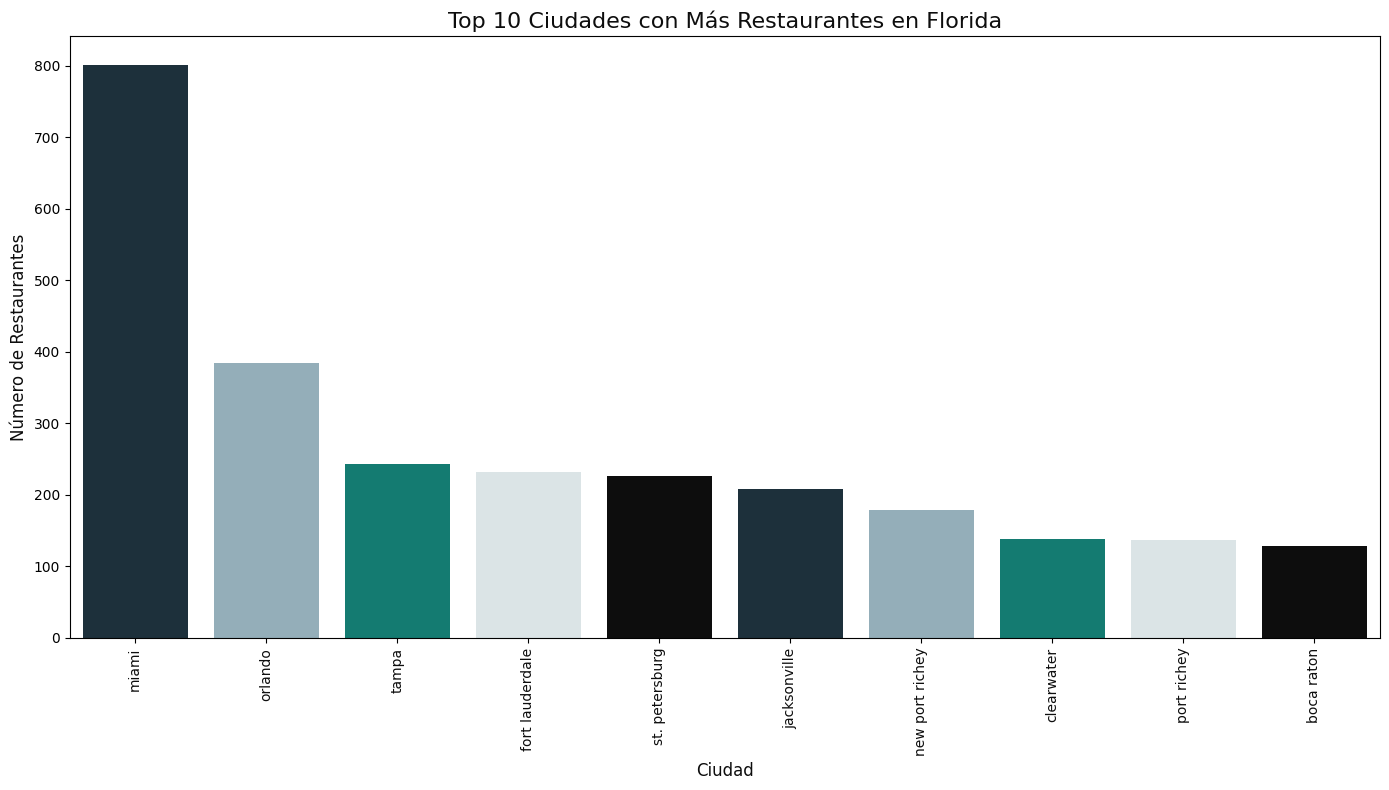

In [39]:
# Suponiendo que tienes una columna 'city' que extrae solo los nombres de las ciudades
city_distribution = combined_data_cleaned['city'].value_counts().head(10)

# Ajusta el tamaño del gráfico para que sea más ancho y legible
plt.figure(figsize=(14, 8))

# Colores personalizados sin #F0F2F2
colors = ['#183140', '#8EB1BF', '#038C7F', '#D9E5E8', '#0D0D0D']

# Gráfico de barras con los colores personalizados
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)

# Título mejorado
plt.title('Top 10 Ciudades con Más Restaurantes en Florida', fontsize=16, color='#0D0D0D')

# Cambia las etiquetas para mayor legibilidad
plt.xlabel('Ciudad', fontsize=12, color='#0D0D0D')
plt.ylabel('Número de Restaurantes', fontsize=12, color='#0D0D0D')

# Rota las etiquetas de las ciudades para que sean más fáciles de leer (90 grados)
plt.xticks(rotation=90, fontsize=10, color='#0D0D0D')

# Muestra el gráfico
plt.tight_layout()
plt.show()


##### A partir de esta grafica podemos observar que ciudades como Miami, Orlando y Tampa tienen un mayor numero de restaurantes, esto no es sorpresa ya que representan las ciudades con mas concentracion turistica, asi como ciudades mas urbanizadas y costeras.

Distribución de Calificaciones (rating):

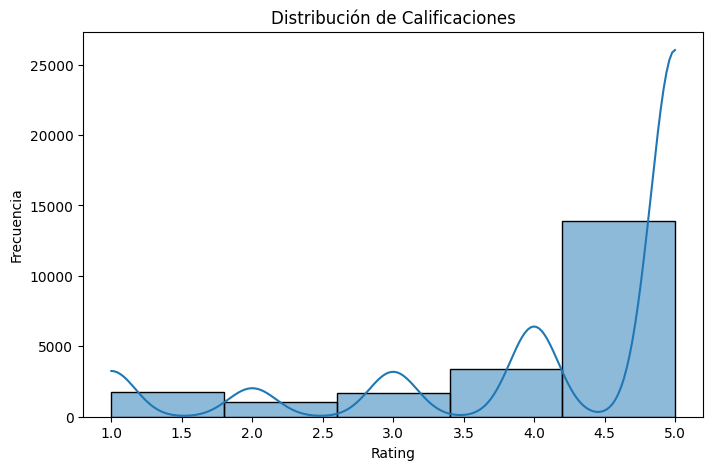

In [40]:


plt.figure(figsize=(8, 5))
sns.histplot(combined_data_cleaned['rating'], bins=5, kde=True)
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


##### La mayor parte de las calificaciones está en el rango de 4.5 a 5.0, lo cual indica una tendencia hacia las calificaciones positivas. Esto podría sugerir que los clientes generalmente están satisfechos con los restaurantes evaluados.
##### Hay algunos picos menores en el rango de calificaciones de 1.0 y 3.0, pero ninguno de ellos se acerca al pico en el rango de 4.5-5. Esto muestra que aunque algunos restaurantes reciben calificaciones más bajas, estos son menos comunes.
##### Es importante tener en cuenta que La distribución no es uniforme; la mayoría de las calificaciones están hacia el extremo superior (4.5-5). Esto implica una posible asimetría positiva, donde los clientes tienden a dar puntuaciones altas en lugar de calificaciones moderadas o bajas.


#### Veamos ahora la distribución de Promedio de Calificaciones de los Restaurantes (avg_rating):

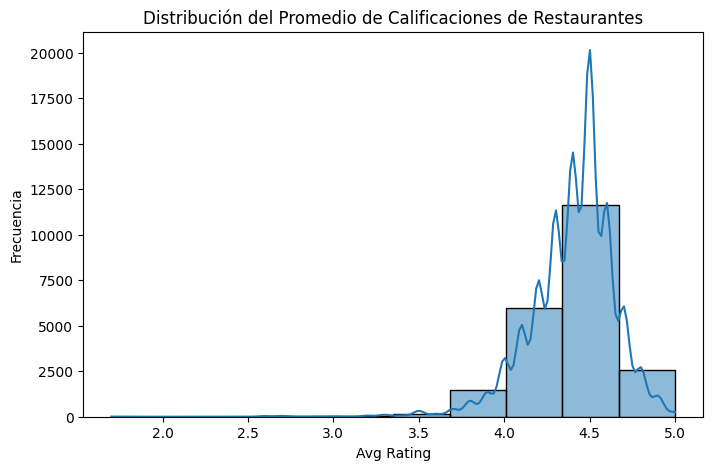

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_cleaned['avg_rating'], bins=10, kde=True)
plt.title('Distribución del Promedio de Calificaciones de Restaurantes')
plt.xlabel('Avg Rating')
plt.ylabel('Frecuencia')
plt.show()


#### Posibles Acciones o Consideraciones:
#### Este análisis indica que la mayoría de los restaurantes se perciben de manera positiva, pero podría ser útil investigar qué factores influyen en que algunos restaurantes mantengan calificaciones promedio más bajas. Además, identificar estos factores podría ayudar a diseñar estrategias de mejora para los que están por debajo del promedio general.

Análisis de Reseñas por Año
Observar cómo varía la cantidad de reseñas con el tiempo  podría revelar tendencias estacionales o cambios en la popularidad de los restaurantes.



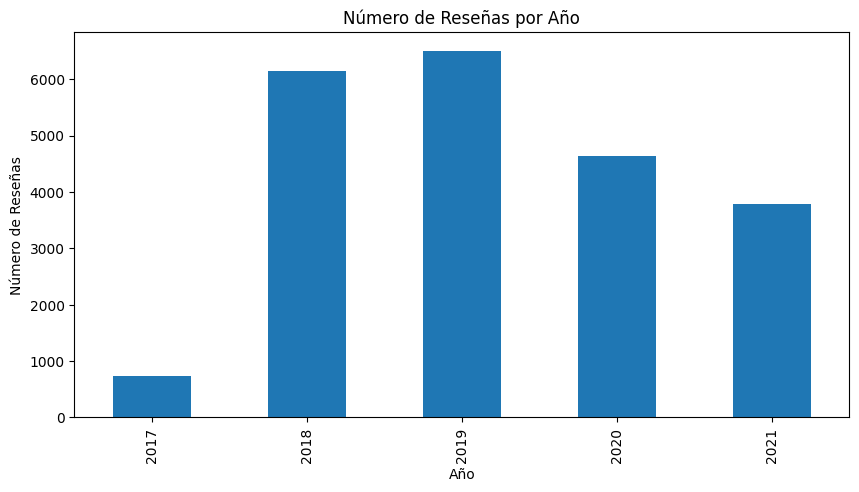

In [42]:
# Cantidad de reseñas por año
reviews_by_year = combined_data_cleaned['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
reviews_by_year.plot(kind='bar')
plt.title('Número de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.show()


#### La gráfica muestra el número de reseñas por año desde 2017 hasta 2021:
#### 2017: Cerca de 1000 reseñas. Este parece ser el punto de partida más bajo.
#### 2018: Un incremento significativo a aproximadamente 6000 reseñas, indicando un aumento considerable en la actividad.
#### 2019: Otro aumento, alcanzando aproximadamente 6500 reseñas, marcando el pico de reseñas en el conjunto de datos.
#### 2020: Una disminución a 5000 reseñas, posiblemente influenciada por eventos globales como la pandemia de COVID-19.
#### 2021: Una caída más pronunciada a alrededor de 3000 reseñas, continuando la tendencia descendente.


#### Análisis de Frecuencia de Reseñas por Restaurante
#### Para identificar restaurantes con más reseñas, analizaremos la distribución de la cantidad de reseñas por restaurante.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\555968881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')


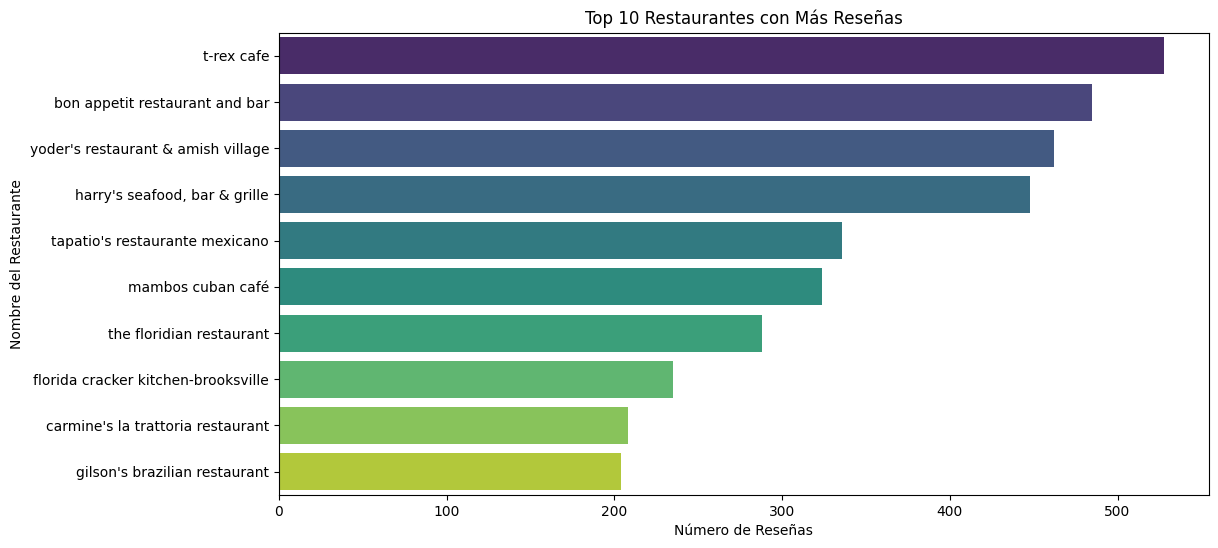

In [43]:
# Restaurantes con mayor número de reseñas
top_restaurants = combined_data_cleaned['restaurant_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')
plt.title('Top 10 Restaurantes con Más Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Nombre del Restaurante')
plt.show()


#### Popularidad Relativa: T-Rex Café tiene la mayor cantidad de reseñas, lo que indica una alta popularidad o visibilidad. Este podría ser un punto de referencia para otros restaurantes en términos de marketing y servicio al cliente.
#### Diversidad Culinaria: La lista incluye una variedad de tipos de cocina, desde mexicana y cubana hasta brasileña y estadounidense. Esto sugiere que hay una alta demanda de diversas opciones culinarias en la región.
#### Ubicación Importante: Restaurantes con nombres que indican una conexión fuerte con la cultura y la cocina local (como Florida Cracker Kitchen y The Floridian Restaurant) también tienen un alto número de reseñas. Esto puede significar que la autenticidad y la conexión con la cultura local son valoradas por los clientes.

#### Promedio de Reseñas por Restaurante

In [44]:
# Calcular el promedio de reseñas por restaurante
average_reviews_per_restaurant = combined_data_cleaned['num_of_reviews'].mean()
print(f"Promedio de reseñas por restaurante: {average_reviews_per_restaurant}")


Promedio de reseñas por restaurante: 1536.013285688107


#### Filtro de restaurantes Americos

In [54]:
#  Filtra los restaurantes de categoría "American"
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]


Distribución de Reseñas
gráficaremos la distribución de reseñas en los restaurantes "tipo americano"

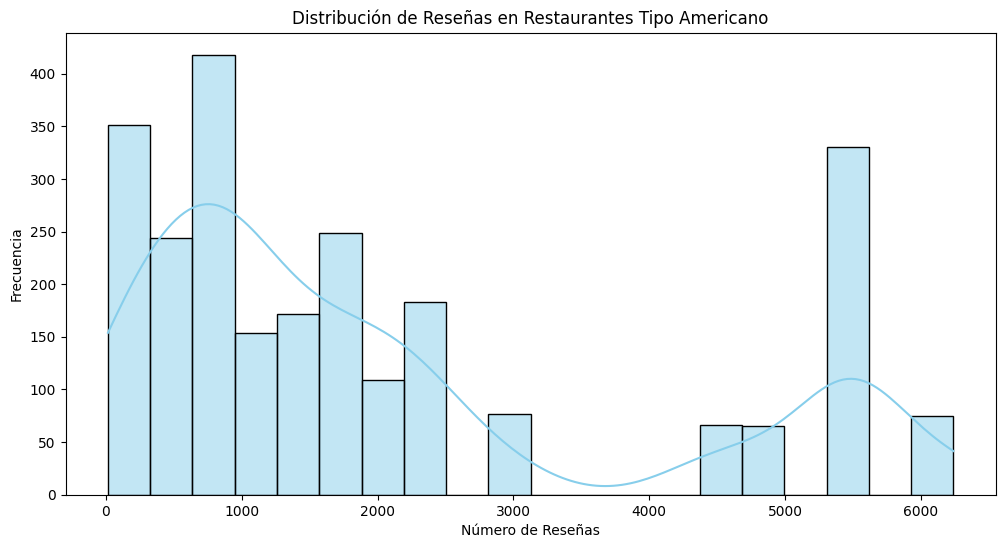

In [57]:
# Gráfico de distribución de reseñas en restaurantes tipo americano
plt.figure(figsize=(12, 6))
sns.histplot(american_restaurants['num_of_reviews'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Reseñas en Restaurantes Tipo Americano')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

#### La gráfica muestra un histograma con la distribución de reseñas en restaurantes tipo americano.
#### Las barras del histograma representan el número de reseñas, organizadas en rangos. La mayoría de los restaurantes tienen un número moderado de reseñas, mientras que unos pocos tienen muchas reseñas.
#### El eje vertical indica la frecuencia, es decir, cuántos restaurantes caen en cada rango de número de reseñas.La mayor concentración de restaurantes parece estar en los rangos más bajos a medios de número de reseñas.
#### La línea suave superpuesta muestra una estimación de densidad, dando una visión más clara de la tendencia general de la distribución. La curva sugiere que hay una mayor densidad de restaurantes con un número bajo a moderado de reseñas, disminuyendo a medida que aumenta el número de reseñas.
#### La mayoría de los restaurantes americanos tienden a tener un número de reseñas moderado, lo que podría indicar una base de clientes constante pero no necesariamente enorme.
#### Los restaurantes que caen en el extremo superior del número de reseñas podrían estar haciendo algo bien en términos de visibilidad, servicio al cliente o marketing, mereciendo un análisis más profundo.
#### Es pertinente analizar qué diferencias existen entre los restaurantes con pocas reseñas y aquellos con muchas puede revelar estrategias efectivas para atraer más clientes y obtener más reseñas.

##### Para analizar las diferencias entre los restaurantes con pocas reseñas y aquellos con muchas reseñas, podemos centrarnos en varios factores clave

1. Clasificación de Restaurantes
Primero, necesitamos clasificar los restaurantes en dos grupos: aquellos con muchas reseñas y aquellos con pocas reseñas.

In [72]:
# Definir umbrales para muchas y pocas reseñas
threshold = 50  # Ajusta este valor según tus datos

# Restaurantes con pocas reseñas
few_reviews = american_restaurants[american_restaurants['num_of_reviews'] < threshold]

# Restaurantes con muchas reseñas
many_reviews = american_restaurants[american_restaurants['num_of_reviews'] >= threshold]


2. Analisis de calificacion: 
Comparar las calificaciones promedio entre los dos grupos.

In [73]:
avg_rating_few = few_reviews['avg_rating'].mean()
avg_rating_many = many_reviews['avg_rating'].mean()

print(f"Calificación promedio (pocas reseñas): {avg_rating_few}")
print(f"Calificación promedio (muchas reseñas): {avg_rating_many}")


Calificación promedio (pocas reseñas): 4.278461538461538
Calificación promedio (muchas reseñas): 4.4045716639209225


In [79]:
# Agrupar por ciudad y contar reseñas
city_review_counts = american_restaurants.groupby('city')['num_of_reviews'].sum().reset_index()

# Clasificar ciudades por umbrales
city_review_counts.sort_values(by='num_of_reviews', ascending=False, inplace=True)

top_10_many_reviews = city_review_counts.head(10)
top_10_few_reviews = city_review_counts.tail(10)

print("Top 10 Ciudades con Muchas Reseñas:")
print(top_10_many_reviews)

print("\nTop 10 Ciudades con Pocas Reseñas:")
print(top_10_few_reviews)


Top 10 Ciudades con Muchas Reseñas:
                 city  num_of_reviews
38         north port           79230
36    new port richey           28875
21       jacksonville           22662
48      pinellas park           20124
5          clearwater           15876
31              miami            8636
51        port orange            8073
15  fort walton beach            6750
12            dunedin            5066
49      pompano beach            3424

Top 10 Ciudades con Pocas Reseñas:
                  city  num_of_reviews
28            maitland              54
53           rockledge              48
52      port st. lucie              48
25         lake placid              45
45         panama city              34
19  indian rocks beach              28
40               ocoee              28
50      port charlotte              24
57            st johns              18
10       daytona beach              16


Distribución Geográfica
Analizar la distribución geográfica para ver si la ubicación afecta el número de reseñas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\2016892116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_of_reviews', y='city', data=top_10_many_reviews, palette='viridis')


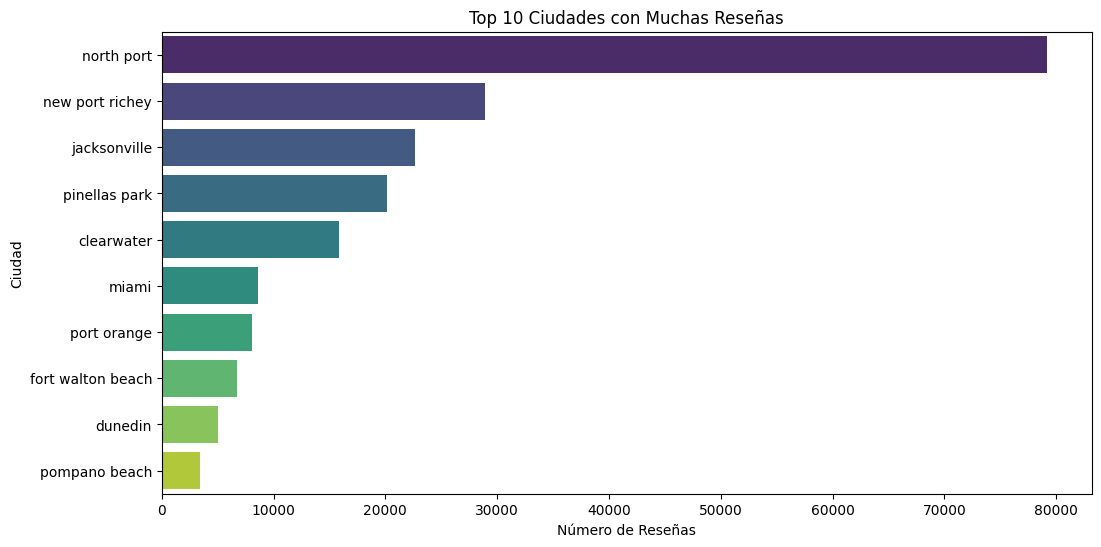

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_of_reviews', y='city', data=top_10_many_reviews, palette='viridis')
plt.title('Top 10 Ciudades con Muchas Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Ciudad')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\2352479757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_of_reviews', y='city', data=top_10_few_reviews, palette='coolwarm')


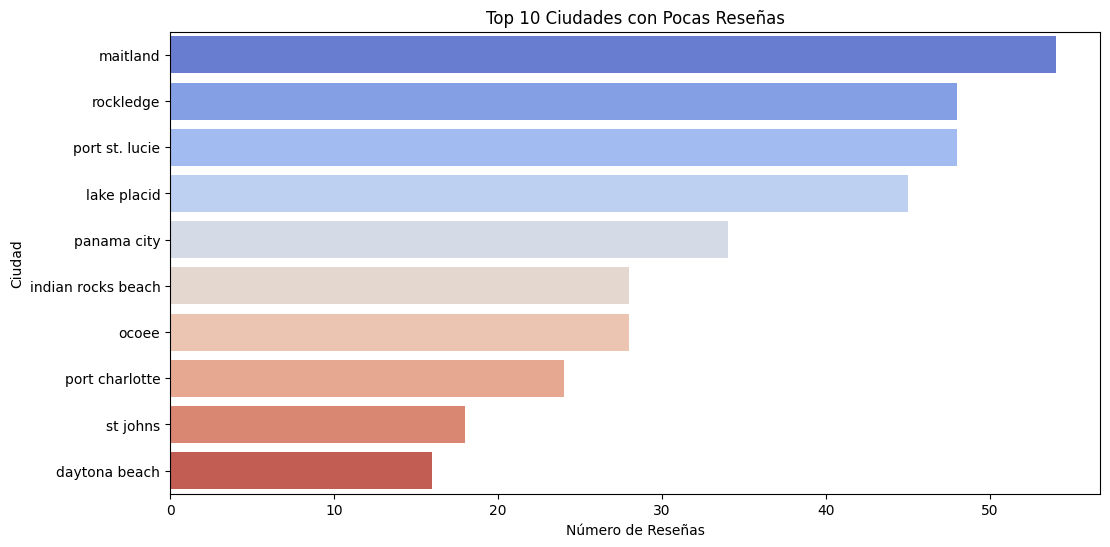

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_of_reviews', y='city', data=top_10_few_reviews, palette='coolwarm')
plt.title('Top 10 Ciudades con Pocas Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Ciudad')
plt.show()


#### Ahora, Compararemos el número de reseñas con la cantidad de restaurantes en cada ciudad esto nos podria brindar  más contexto sobre su popularidad y visibilidad. Vamos a obtener el top 10 de ciudades con más restaurantes y compararlas.

Paso 1: Calcular el Top 10 de Ciudades con Más Restaurantes
Agrupar los Datos por Ciudad:

In [82]:
# Contar el número de restaurantes por ciudad
restaurant_counts = american_restaurants['city'].value_counts().reset_index()
restaurant_counts.columns = ['city', 'num_of_restaurants']

# Obtener el top 10 de ciudades con más restaurantes
top_10_cities_restaurants = restaurant_counts.head(10)

print("Top 10 Ciudades con Más Restaurantes:")
print(top_10_cities_restaurants)


Top 10 Ciudades con Más Restaurantes:
              city  num_of_restaurants
0       north port                  57
1            miami                  44
2  new port richey                  37
3     jacksonville                  35
4    pinellas park                  28
5       clearwater                  27
6          orlando                  25
7          dunedin                  17
8       fort myers                  15
9         sarasota                  13


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\4087694958.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\4087694958.py:11: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)


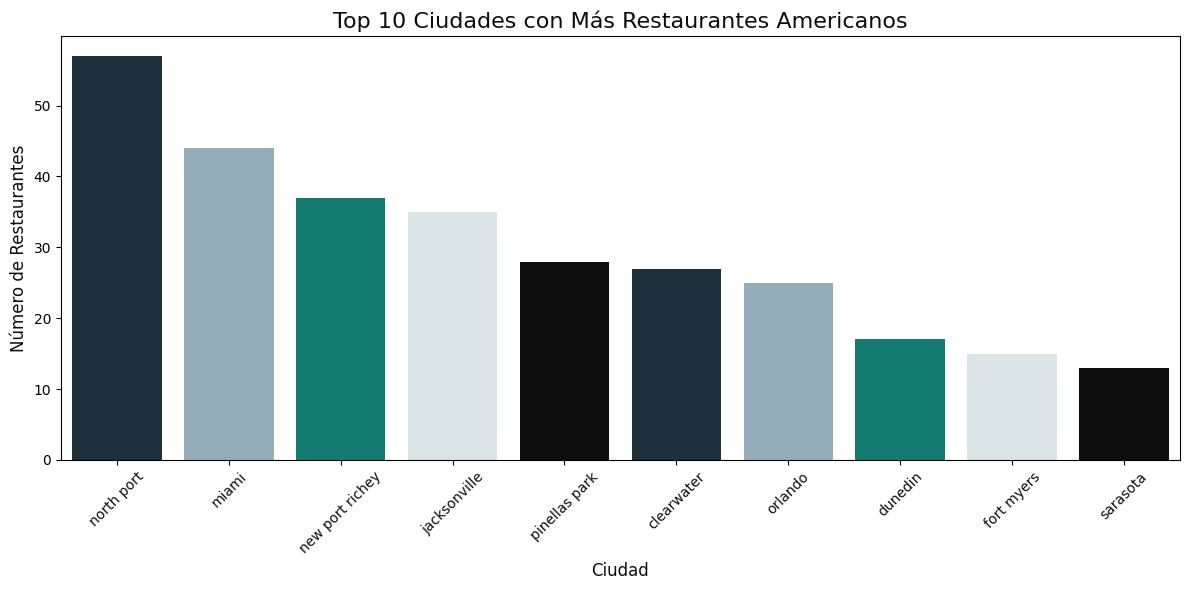

In [84]:
# Obtén la distribución de restaurantes por ciudad (top 10 ciudades)
city_distribution = american_restaurants['city'].value_counts().head(10)

# Crear la visualización
plt.figure(figsize=(12, 6))

# Colores personalizados
colors = ['#183140', '#8EB1BF', '#038C7F', '#D9E5E8', '#0D0D0D']

# Gráfico de barras con los colores personalizados
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)

# Añadir títulos y etiquetas
plt.title('Top 10 Ciudades con Más Restaurantes Americanos', fontsize=16, color='#0D0D0D')
plt.xlabel('Ciudad', fontsize=12, color='#0D0D0D')
plt.ylabel('Número de Restaurantes', fontsize=12, color='#0D0D0D')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, fontsize=10, color='#0D0D0D')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Comparemos las ciudades con mas reseñas vs con mas restuarentes

In [86]:
# Contar el número de reseñas por ciudad
city_review_counts = american_restaurants.groupby('city')['num_of_reviews'].sum().reset_index()
city_review_counts.columns = ['city', 'num_of_reviews']

# Contar el número de restaurantes por ciudad
restaurant_counts = american_restaurants['city'].value_counts().reset_index()
restaurant_counts.columns = ['city', 'num_of_restaurants']

# Obtener el top 10 de ciudades con más reseñas y más restaurantes
top_10_many_reviews = city_review_counts.sort_values(by='num_of_reviews', ascending=False).head(10)
top_10_cities_restaurants = restaurant_counts.head(10)


In [87]:
# Unir los datos de las ciudades con más reseñas y más restaurantes
comparison = pd.merge(top_10_many_reviews, top_10_cities_restaurants, on='city', how='inner')

print("Comparación de Ciudades con Muchas Reseñas y Más Restaurantes:")
print(comparison)


Comparación de Ciudades con Muchas Reseñas y Más Restaurantes:
              city  num_of_reviews  num_of_restaurants
0       north port           79230                  57
1  new port richey           28875                  37
2     jacksonville           22662                  35
3    pinellas park           20124                  28
4       clearwater           15876                  27
5            miami            8636                  44
6          dunedin            5066                  17


##### Visualización
Crear Gráficos de Barras Comparativos:

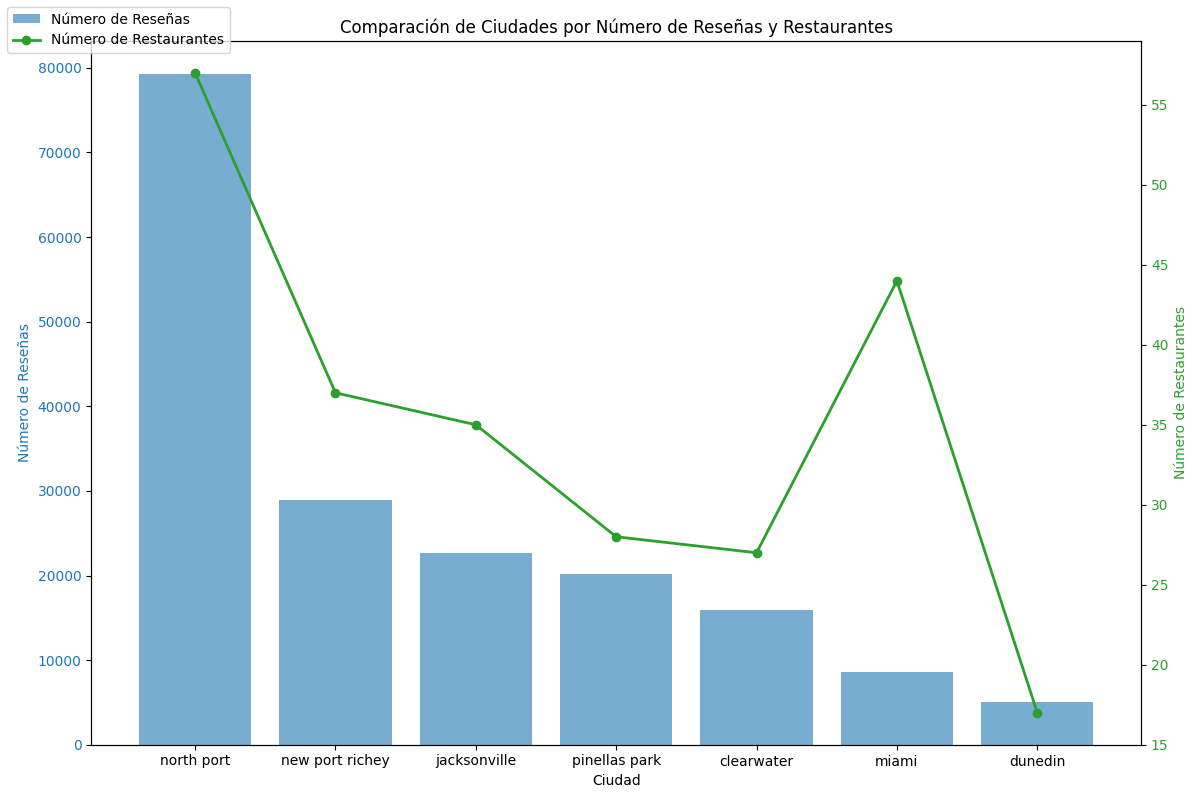

In [93]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Crear el gráfico de columnas (Número de Reseñas)
color = 'tab:blue'
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Número de Reseñas', color=color)
bars = ax1.bar(comparison['city'], comparison['num_of_reviews'], color=color, alpha=0.6, label='Número de Reseñas')
ax1.tick_params(axis='y', labelcolor=color)

# Crear el segundo eje y
ax2 = ax1.twinx()

# Crear el gráfico de líneas (Número de Restaurantes)
color = 'tab:green'
ax2.set_ylabel('Número de Restaurantes', color=color)
lines = ax2.plot(comparison['city'], comparison['num_of_restaurants'], color=color, marker='o', linewidth=2, label='Número de Restaurantes')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
plt.title('Comparación de Ciudades por Número de Reseñas y Restaurantes')
fig.tight_layout()
fig.legend([bars, lines[0]], ['Número de Reseñas', 'Número de Restaurantes'], loc='upper left')

# Mostrar la gráfica
plt.show()


La gráfica muestra una comparación entre el número de reseñas y el número de restaurantes en diferentes ciudades.Las barras azules representan el número de reseñas, mientras que la línea verde con puntos representa el número de restaurantes.
- North Port tiene el mayor número de reseñas, con más de 60,000.
- Dunedin tiene el menor número de reseñas, con menos de 10,000.
- Miami tiene el mayor número de restaurantes, con más de 45.
- Dunedin tiene el menor número de restaurantes, con 15.

Desconexión entre Reseñas y Restaurantes: Miami tiene el mayor número de restaurantes, pero no el mayor número de reseñas. Esto podría indicar que, aunque hay muchos restaurantes, no todos están atrayendo reseñas.
Popularidad Localizada: North Port, a pesar de tener menos restaurantes que Miami, tiene el mayor número de reseñas. Esto sugiere que los restaurantes allí tienen una base de clientes más involucrada o satisfecha.
Oportunidades para Promoción: Dunedin tiene pocos restaurantes y pocas reseñas. Focalizar esfuerzos de marketing en esta ciudad podría aumentar tanto el número de restaurantes como las reseñas.

### Ahora realizaremos en la analisis para los restaurantes de comida america
### Evaluemos la cantidad de restauranres vs su calificacion promedio 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\154050922.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


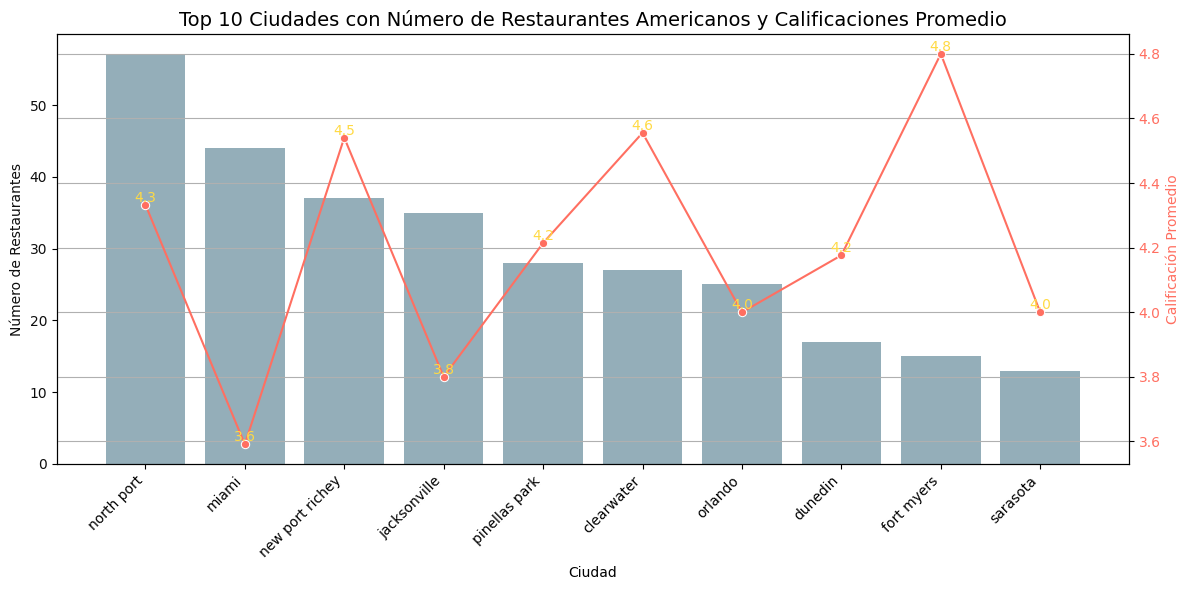

In [94]:
# Filtra los restaurantes de categoría "American"
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]

# Obtén la distribución de restaurantes por ciudad (top 10 ciudades)
top_10_cities = american_restaurants['city'].value_counts().head(10)

# Filtra los restaurantes de esas top 10 ciudades
top_city_restaurants = american_restaurants[american_restaurants['city'].isin(top_10_cities.index)]

# Calcula la calificación promedio por ciudad
average_ratings = top_city_restaurants.groupby('city')['rating'].mean()

# Crear la visualización
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores para las gráficas
bar_color = '#8EB1BF'  # Color de las barras
line_color = '#FF6F61'  # Color para la línea de calificaciones promedio
text_color = '#FFDA44'  # Color para las etiquetas de calificación promedio

# Gráfico de número de restaurantes
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Número de Restaurantes', color='#0D0D0D')  # Color para el eje Y de número de restaurantes
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, color=bar_color, ax=ax1)  # Color de las barras
ax1.tick_params(axis='y', labelcolor='#0D0D0D')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Crear un segundo eje Y
ax2 = ax1.twinx()
ax2.set_ylabel('Calificación Promedio', color=line_color)  # Color para el eje Y de calificación promedio
sns.lineplot(x=average_ratings.index, y=average_ratings.values, color=line_color, marker='o', ax=ax2)  # Color para la línea
ax2.tick_params(axis='y', labelcolor=line_color)

# Añadir etiquetas a los puntos de calificación promedio
for city, rating in average_ratings.items():
    ax2.text(city, rating, f'{rating:.1f}', color=text_color, ha='center', va='bottom', fontsize=10)  # Color para las etiquetas

# Ajustar estilo y título
plt.title('Top 10 Ciudades con Número de Restaurantes Americanos y Calificaciones Promedio', fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### el gráfico revela un contraste entre el número de restaurantes y las calificaciones promedio, lo que sugiere que más no siempre es mejor. Las ciudades con menos restaurantes a menudo tienen mejores calificaciones, lo que podría ser un indicador de que los clientes valoran la calidad sobre la cantidad, y que los restaurantes en ciudades con más competencia podrían beneficiarse de centrarse en mejorar la experiencia del cliente para elevar sus calificaciones

Paso 2: Calcular el Top 10 de Ciudades con Más Reseñas y Restaurantes

In [99]:
# Contar el número de restaurantes por ciudad
restaurant_counts = american_restaurants['city'].value_counts().reset_index()
restaurant_counts.columns = ['city', 'num_of_restaurants']

# Contar el número de reseñas por ciudad
city_review_counts = american_restaurants.groupby('city')['num_of_reviews'].sum().reset_index()
city_review_counts.columns = ['city', 'num_of_reviews']

# Obtener el top 10 de ciudades con más restaurantes y más reseñas
top_10_cities_restaurants = restaurant_counts.head(10)
top_10_many_reviews = city_review_counts.sort_values(by='num_of_reviews', ascending=False).head(10)


Paso 3: Fusionar los Datos

In [100]:
# Unir los datos de las ciudades con más reseñas y más restaurantes
comparison = pd.merge(top_10_cities_restaurants, top_10_many_reviews, on='city', how='inner')

print("Comparación de Ciudades con Más Restaurantes y Más Reseñas de Restaurantes de Comida Americana:")
print(comparison)


Comparación de Ciudades con Más Restaurantes y Más Reseñas de Restaurantes de Comida Americana:
              city  num_of_restaurants  num_of_reviews
0       north port                  57           79230
1            miami                  44            8636
2  new port richey                  37           28875
3     jacksonville                  35           22662
4    pinellas park                  28           20124
5       clearwater                  27           15876
6          dunedin                  17            5066


Paso 4: Crear la Gráfica de Doble Eje Y

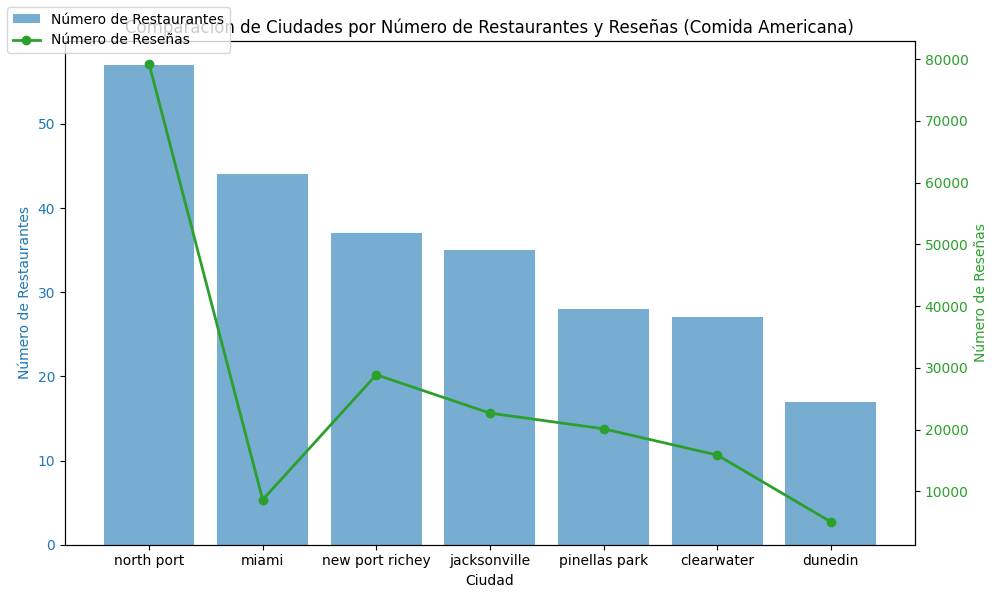

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de columnas (Número de Restaurantes)
color = 'tab:blue'
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Número de Restaurantes', color=color)
bars = ax1.bar(comparison['city'], comparison['num_of_restaurants'], color=color, alpha=0.6, label='Número de Restaurantes')
ax1.tick_params(axis='y', labelcolor=color)

# Crear el segundo eje y
ax2 = ax1.twinx()

# Crear el gráfico de líneas (Número de Reseñas)
color = 'tab:green'
ax2.set_ylabel('Número de Reseñas', color=color)
lines = ax2.plot(comparison['city'], comparison['num_of_reviews'], color=color, marker='o', linewidth=2, label='Número de Reseñas')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
plt.title('Comparación de Ciudades por Número de Restaurantes y Reseñas (Comida Americana)')
fig.tight_layout()
fig.legend([bars, lines[0]], ['Número de Restaurantes', 'Número de Reseñas'], loc='upper left')

# Mostrar la gráfica
plt.show()


#### En esta grafica es posible observar: 
##### Desconexión entre Reseñas y Restaurantes: Miami tiene muchos restaurantes pero no necesariamente muchas reseñas. Esto podría indicar la necesidad de estrategias que promuevan más activamente las reseñas.
##### Popularidad Localizada: North Port es un caso destacado con alta actividad de reseñas. Analizar por qué tiene tanto éxito puede ofrecer estrategias replicables.
##### Oportunidades de Crecimiento: Ciudades como Dunedin y Miami, que tienen menos reseñas en comparación con su número de restaurantes, pueden beneficiarse de una mayor promoción y mejores prácticas de servicio al cliente.

Nube de Palabras (Word Cloud) en Reseñas, esto analisis ayuda a visualizar las palabras más frecuentes en los comentarios de los usuarios

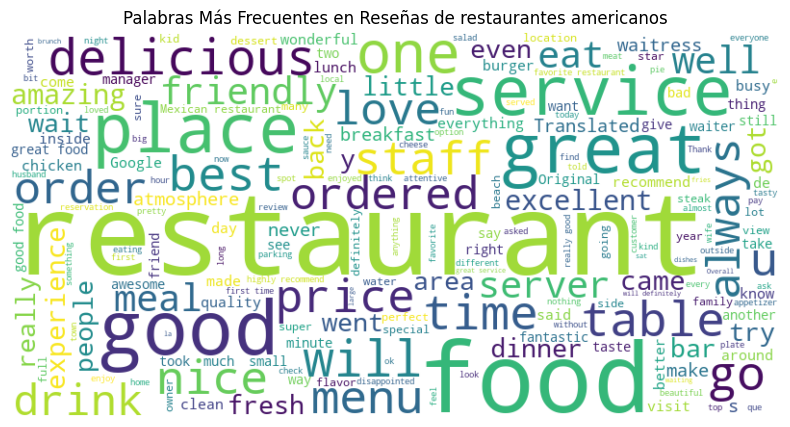

In [103]:
text = " ".join(review for review in american_restaurants['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Más Frecuentes en Reseñas de restaurantes americanos')
plt.show()


1. Palabras más Grandes y Frecuentes:
- Restaurant: Indica que los clientes mencionan mucho el término "restaurante", centrando sus comentarios en el lugar en sí.
- Food: La comida es un tema predominante, lo cual es natural para reseñas de restaurantes.
- Service: El servicio es otra área clave mencionada, señalando su importancia en la experiencia del cliente.
- Place, Good, Great: Estas palabras reflejan la experiencia general del cliente.
- Staff, Order, Friendly, Delicious: Destacan aspectos específicos del servicio y la calidad de la comida.
2. Palabras Asociadas a Experiencias Positivas:Amazing, Excellent, Love, Best, Awesome.Estas palabras reflejan altos niveles de satisfacción.
3. Términos Relacionados con el Servicio: Wait, Server, Waitress, Quick, Attentive.Señalan la interacción con el personal y la rapidez del servicio.
4. Aspectos de la Comida:Menu, Meal, Portion, Quality, Fresh.Indicaciones claras de lo que valoran los clientes respecto a la comida.
5. Ambiente y Ubicación:Atmosphere, Location, Spot, Clean. Elementos que mejoran la experiencia general del cliente.

Análisis de Correlación entre Variables Numéricas
Explora posibles correlaciones entre las variables numéricas para identificar patrones de relación

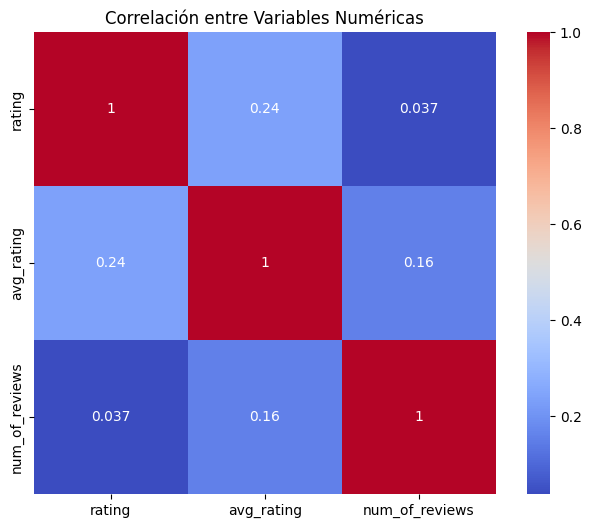

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(combined_data_cleaned[['rating', 'avg_rating', 'num_of_reviews']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlación entre Variables Numéricas')
plt.show()


##### Las correlaciones entre estas variables son bastante bajas. Esto implica que los cambios en una variable no están fuertemente asociados con cambios en otra.
##### Las calificaciones individuales y promedios parecen ser más independientes de la cantidad de reseñas.

#### De acuerdo con la informacion obtenida veamos cual es % de restaurentes tipo americano por ciudad

In [66]:
# Calcular el total de restaurantes por ciudad
total_restaurants_per_city = combined_data_cleaned['city'].value_counts()

# Calcular el total de restaurantes tipo americano por ciudad
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]
american_restaurants_per_city = american_restaurants['city'].value_counts()

# Calcular el promedio
average_total_restaurants = total_restaurants_per_city.mean()
average_american_restaurants = american_restaurants_per_city.mean()

# Imprimir resultados
print(f'Promedio de restaurantes por ciudad: {average_total_restaurants:.2f}')
print(f'Promedio de restaurantes americanos por ciudad: {average_american_restaurants:.2f}')


Promedio de restaurantes por ciudad: 25.74
Promedio de restaurantes americanos por ciudad: 7.83


In [67]:
Porcen_derestaurate_americano_por_ciudad= (average_american_restaurants/ average_total_restaurants) * 100
print(Porcen_derestaurate_americano_por_ciudad)

30.400986644596983


En pormedio el 30,4% de los restaurentes de cada ciudad en florida son restaurantes tipo americano.

In [21]:
m = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)  # Centrado en Florida
HeatMap(american_restaurants[['latitude', 'longitude', 'avg_rating']].values, radius=15).add_to(m)
m.save('heatmap_american_restaurants.html')


Las áreas con colores más intensos representan zonas con mayor concentración de restaurantes con altas calificaciones.

Distribución restaurantes tipo americano abiertos por dias de la semana 

In [22]:
american_restaurants.head(1)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,city,review_length
111,101566886337322188723,2021-06-04 19:32:55,5,(Translated by Google) Excellent service from ...,0x88d9c1f2ac59568b:0x7e92fe0dcd4a9311,2021,rinconcito miami #5 - kendall breeze,"rinconcito miami #5 - kendall breeze, 12700 sw...",25.648548,-80.399625,...,"{'Monday': '08:00:00-16:00:00', 'Tuesday': '08...",08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,No hay información,miami,408


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\1782004084.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_restaurants.loc[idx, f'{day}_open'] = open_time
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\1782004084.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_restaurants.loc[idx, f'{day}_close'] = close_time
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23732\1782004084.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

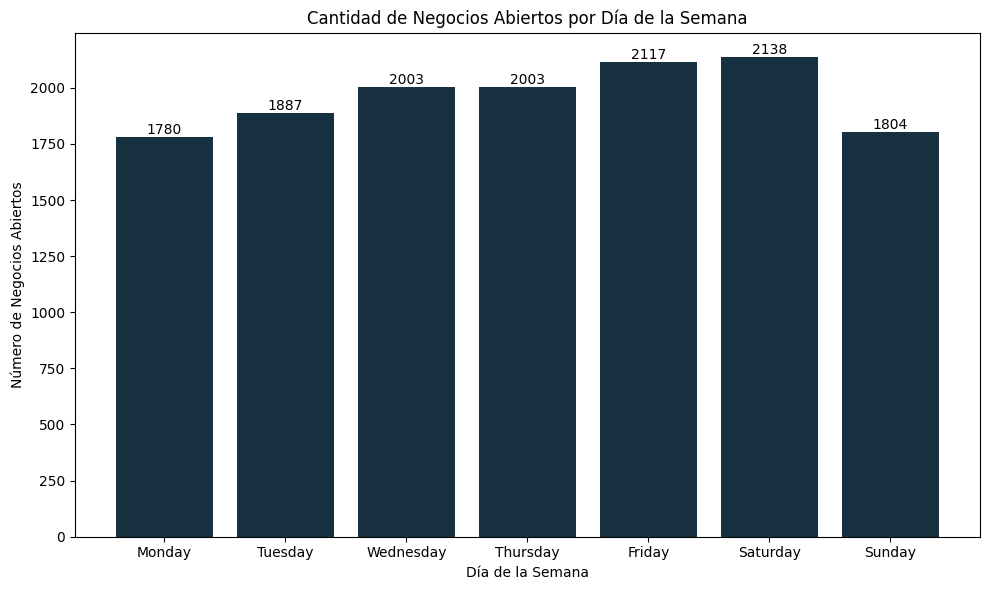

In [ ]:
# Función para procesar la columna 'hours' y crear nuevas columnas por día
def process_hours(row, idx):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Verificar si row es un diccionario
    if isinstance(row, str):
        try:
            hours_dict = eval(row)  # Convertir la cadena a un diccionario
        except Exception:
            return  # Si no se puede convertir, salir
    else:
        return  # Si no es válido, salir
    
    for day in days:
        if day in hours_dict and hours_dict[day] is not None:
            open_time, close_time = hours_dict[day].split('-')
            american_restaurants.loc[idx, f'{day}_open'] = open_time
            american_restaurants.loc[idx, f'{day}_close'] = close_time
        else:
            american_restaurants.loc[idx, f'{day}_open'] = np.nan
            american_restaurants.loc[idx, f'{day}_close'] = np.nan

# Aplicar la función a la columna 'hours'
for idx, row in american_restaurants['hours'].items():
    process_hours(row, idx)

# Contar cuántos negocios están abiertos al menos un día de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_counts = {day: american_restaurants[f'{day}_open'].notna().sum() for day in days}

# Crear un gráfico de barra
plt.figure(figsize=(10, 6))
plt.bar(open_counts.keys(), open_counts.values(), color='#183140')  # Cambiar el color a #183140

# Agregar etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Negocios Abiertos')
plt.title('Cantidad de Negocios Abiertos por Día de la Semana')

# Mostrar la cantidad de negocios encima de cada barra
for day, count in open_counts.items():
    plt.text(day, count, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


Se logra observar que hay mayor cantidad de restaurantes abiertos los viernes y sabados. y los lunes y domingo disminuyen notablemente

In [111]:
combined_data_cleaned.head(1)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,num_of_reviews,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,city
0,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,No hay información,apalachicola


Vamos a separar en 2 los dataframe

In [112]:
# Seleccionar columnas para el DataFrame horarios_google
horarios_google = combined_data_cleaned[['user_id', 'hours', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Seleccionar todas las columnas excepto las de horarios para el DataFrame datos_google
datos_google = combined_data_cleaned.drop(columns=['hours', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Mostrar la primera fila de cada DataFrame para verificar
print("Horarios de Google:")
print(horarios_google.head(1))

print("\nDatos Google:")
print(datos_google.head(1))


Horarios de Google:
                 user_id                                              hours  \
0  105941553219163737304  {'Monday': None, 'Tuesday': None, 'Wednesday':...   

               Monday             Tuesday           Wednesday  \
0  No hay información  No hay información  No hay información   

             Thursday              Friday            Saturday  \
0  No hay información  No hay información  No hay información   

               Sunday  
0  No hay información  

Datos Google:
                 user_id                 time  rating  \
0  105941553219163737304  2018-09-20 00:12:47       1   

                                                text  \
0  Love this place. Great little restaurant, with...   

                                 gmap_id  year  \
0  0x8894b5a7a7909725:0xe4687299fd288188  2018   

                                     restaurant_name  \
0  gormley's on the river | modern cuisine in his...   

                                             address  

Tabla datos_google: user_id es la clave primaria, asegurando la unicidad de cada usuario o restaurante.
Tabla horarios_google: user_id actúa como clave foránea que enlaza cada registro con su respectiva información en datos_google.

#### Exportando dataframe 

In [113]:
horarios_google.to_csv('horarios_google.csv', index=False)
datos_google.to_csv('datosfinal_google.csv', index=False)

In [115]:
datos_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          21828 non-null  object 
 1   time             21828 non-null  object 
 2   rating           21828 non-null  int64  
 3   text             21828 non-null  object 
 4   gmap_id          21828 non-null  object 
 5   year             21828 non-null  int64  
 6   restaurant_name  21828 non-null  object 
 7   address          21828 non-null  object 
 8   latitude         21828 non-null  float64
 9   longitude        21828 non-null  float64
 10  category         21828 non-null  object 
 11  avg_rating       21828 non-null  float64
 12  num_of_reviews   21828 non-null  int64  
 13  city             6847 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 2.3+ MB
